In [2]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
fname = '../../cleaned_data/B00CWU48VI_y1.csv'
df_y1 = pd.read_csv(fname)
df_y1.head()

,Unnamed: 0,(Parent) ASIN,Title,Sessions,Session Percentage,Page Views,Page Views Percentage,Buy Box Percentage,Units Ordered,Unit Session Percentage,Ordered Product Sales,Total Order Items
0,0,B00CWU48VI,Isolation Vibration m6 Rubber Mount Replacemen...,69.0,0.17,94.0,0.19,95.0,13.0,18.84,108.20,11.0
1,1,B00CWU48VI,Isolation Vibration m6 Rubber Mount Replacemen...,32.0,0.11,44.0,0.12,89.0,6.0,18.75,51.15,5.0
2,2,B00CWU48VI,Isolation Vibration m6 Rubber Mount Replacemen...,20.0,0.14,41.0,0.20,78.0,3.0,15.00,25.96,3.0
3,0,B00CWU48VI,Isolation Vibration m6 Rubber Mount Replacemen...,42.0,0.20,71.0,0.25,61.0,12.0,28.57,101.62,12.0
4,3,B00CWU48VI,Isolation Vibration m6 Rubber Mount Replacemen...,26.0,0.14,34.0,0.14,94.0,3.0,11.54,25.20,3.0


#### Remove unnamed column 

In [4]:
#del df_y1['Unnamed: 0']
#del df_y1['Total Order Items']
del df_y1['Ordered Product Sales']

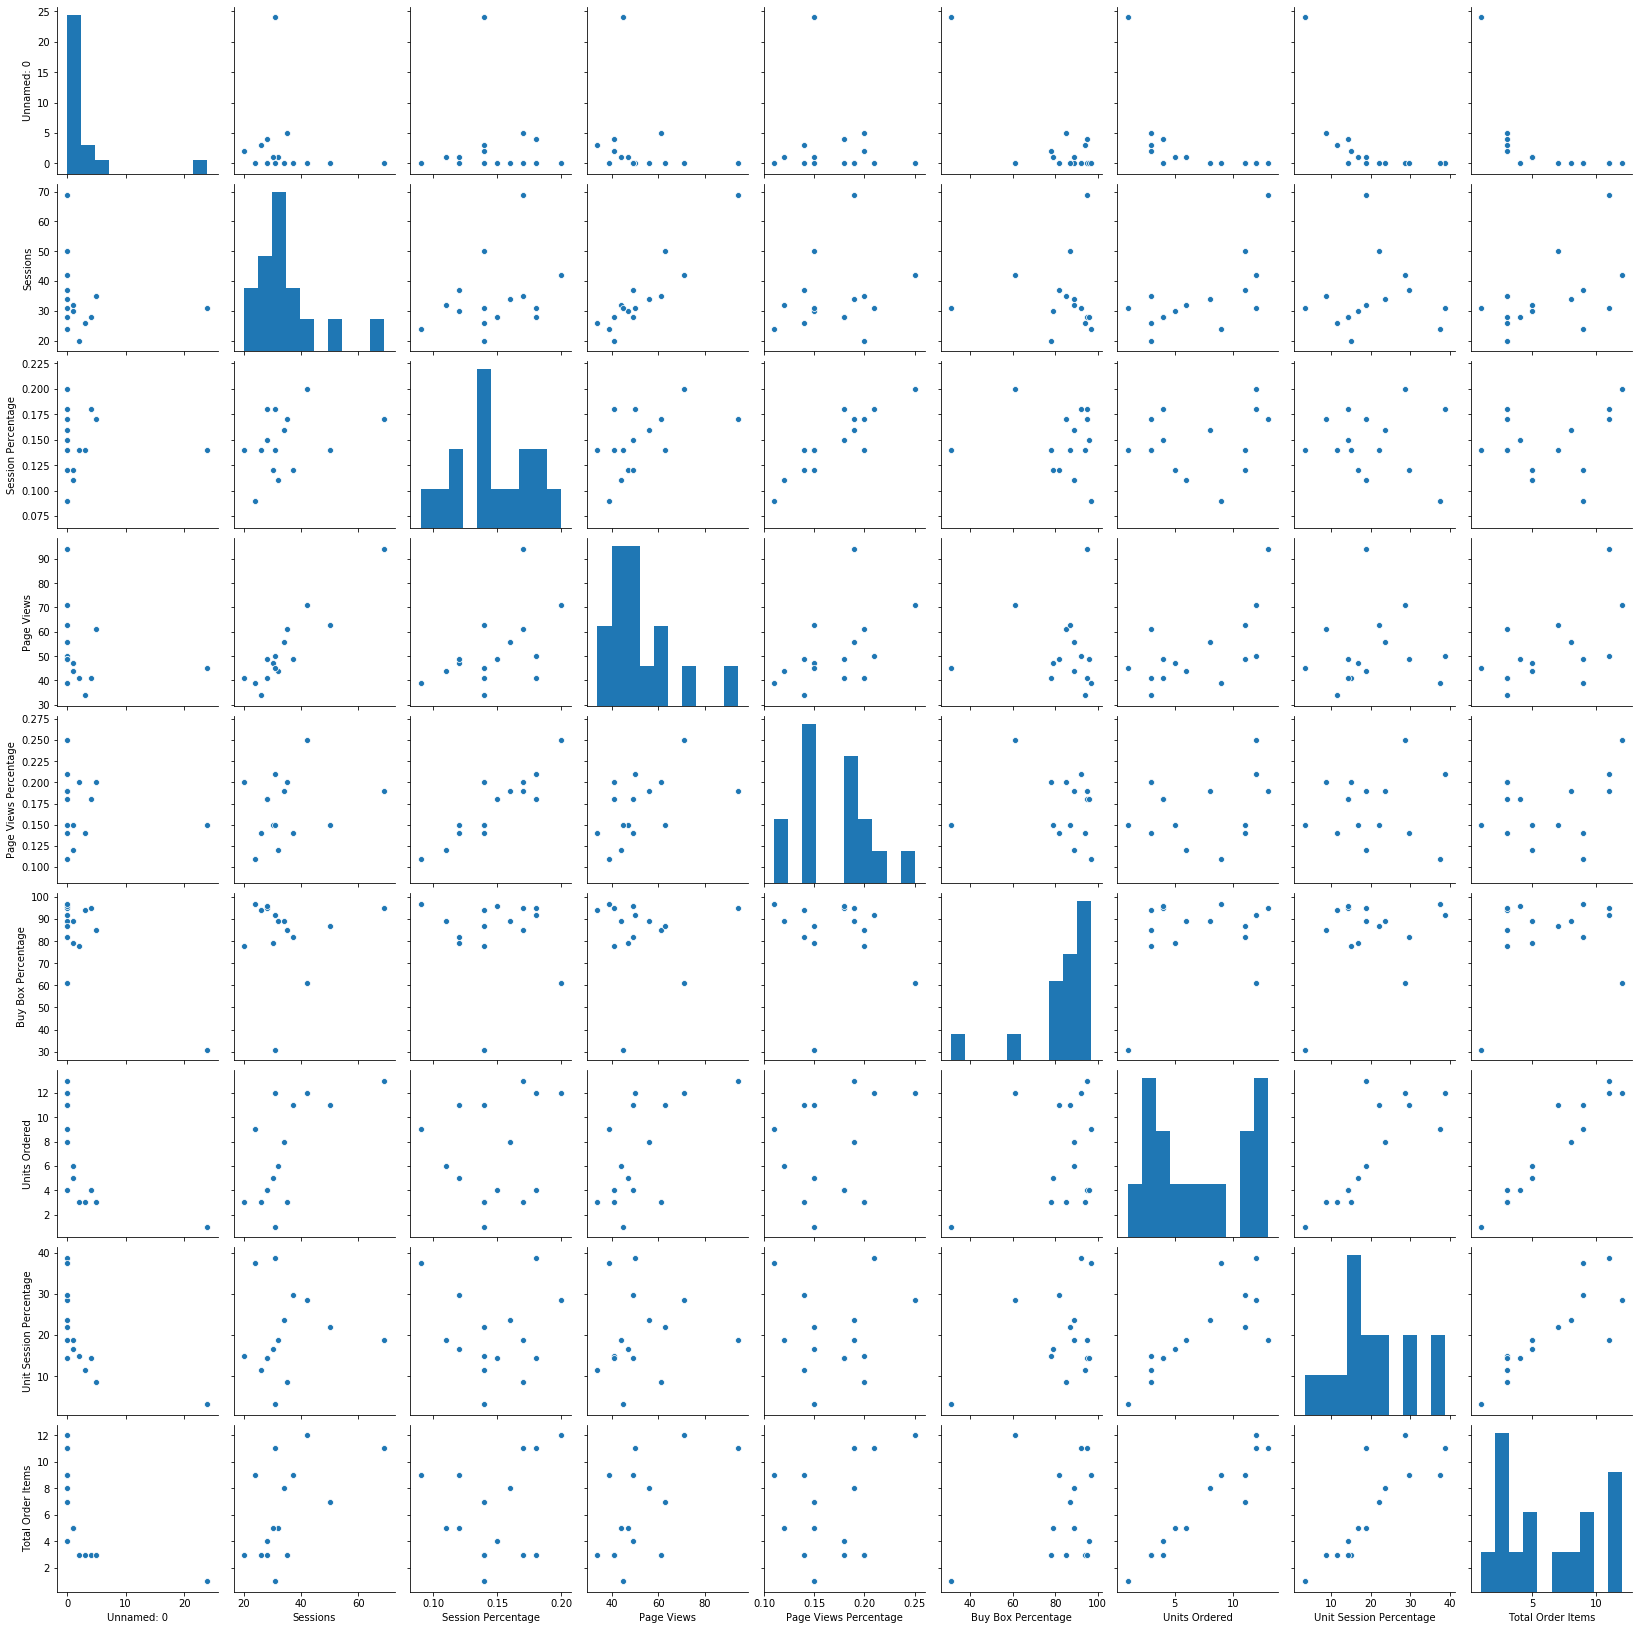

In [5]:
sns.pairplot(df_y1)

#### Model fitting 

$D_t$ = b$p_t$ + f($x_t$) + $\epsilon_t$ 

Assume that the Demand (i.e., Units Ordered) is a function of the price and features in the data, $x_t$ is a vector of features. In addition, f($x_t$) is a model of the features, which could be linear f($x_t$) = $\theta^T x_t$, or some non-linear function of $x_t$. $\theta$ is a vector of parameters, and $b$ is another parameter related to how demand reacts to price explicitly. Note that there's constrait that $b < 0$ to make sense physically (i.e., demand should go down if prices go up). The subscript t denotes the properties at a given time t.  $\epsilon_t$ is a noise term that has property $< \epsilon_t >_t = 0$, after averaging over long period of time. 

Note also, this is data for a single product. To increase the volume of data, one might consider grouping products with the same or similar categories. 

In the following, I will use a random forest regression model to fit the features. 

In [6]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 10, random_state=0)

In [30]:
unit_price = 4.98
price = unit_price*np.ones_like(df_y1['Page Views']) # $8.19 
X = np.array([price, df_y1['Page Views'], df_y1['Sessions']]).T  # shape = (n_samples,n_features) = (15,3)
y = df_y1['Units Ordered']

X.shape

(15, 3)

In [31]:
model.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [32]:
# number of bins
n_bins = 100
page_view_grid = np.linspace(min(df_y1['Page Views']), max(df_y1['Page Views']), n_bins)
session_grid = np.linspace(min(df_y1['Sessions']), max(df_y1['Sessions']), n_bins)
price_grid = np.ones_like(session_grid)*unit_price
X_grid = np.array([price_grid,page_view_grid,session_grid]).T  # shape = (n_bins, n_features)

In [33]:
X_grid[0]
#model.predict(X_grid)

array([ 4.98, 34.  , 20.  ])

In [35]:
model.predict(X_grid)

array([ 6.1,  6.1,  6.1,  6.1,  6.1,  7.3,  7.4,  7.4,  7.4,  7.5,  7. ,
        3.7,  3.7,  3.7,  3.7,  4.2,  4.2,  4.3,  3.8,  4.2,  3.7,  3.9,
        3.1,  3.2,  5.1,  5.1,  8.2,  8.9,  8.9,  8.9,  8.4,  8.4,  8.6,
        9.5,  9.5,  9.5,  9.5, 10.1, 10.1, 10.1, 10.3, 10.3, 10.2, 10.3,
       10.3, 10.3, 10.3, 11.1, 11.1, 11.5, 11.5, 11.5, 11.5, 11.4, 11.4,
       11.6, 11.6, 11.6, 11.6, 11.6, 11.6, 11.6, 11.8, 11.8, 11.8, 11.8,
       11.8, 11.8, 11.8, 11.8, 11.8, 11.8, 11.9, 11.9, 12.3, 12.3, 12.3,
       12.3, 12.3, 12.3, 12.5, 12.7, 12.7, 12.7, 12.7, 12.7, 12.7, 12.7,
       12.7, 12.7, 12.7, 12.7, 12.7, 12.7, 12.7, 12.7, 12.7, 12.7, 12.7,
       12.7])